In [1]:
import os
os.getcwd()


'C:\\Users\\CVR'

In [3]:
os.chdir('D:\\5br\\JupNote')

In [5]:
os.getcwd()

'D:\\5br\\JupNote'

In [7]:
import pandas as pd
data=pd.read_csv('GlobalLandTemperaturesByCity.csv')
data

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
...,...,...,...,...,...,...,...
8599207,2013-05-01,11.464,0.236,Zwolle,Netherlands,52.24N,5.26E
8599208,2013-06-01,15.043,0.261,Zwolle,Netherlands,52.24N,5.26E
8599209,2013-07-01,18.775,0.193,Zwolle,Netherlands,52.24N,5.26E
8599210,2013-08-01,18.025,0.298,Zwolle,Netherlands,52.24N,5.26E


In [14]:
import matplotlib.pyplot as plt
import numpy as np

In [22]:
data['dt'].dtype

dtype('O')

In [36]:
data['dt']=pd.to_datetime(data['dt'])


In [38]:
data['dt'].dtype

dtype('<M8[ns]')

In [44]:
data['Year']=data['dt'].dt.year

In [46]:
data

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,Year
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E,1743
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E,1743
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E,1744
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E,1744
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E,1744
...,...,...,...,...,...,...,...,...
8599207,2013-05-01,11.464,0.236,Zwolle,Netherlands,52.24N,5.26E,2013
8599208,2013-06-01,15.043,0.261,Zwolle,Netherlands,52.24N,5.26E,2013
8599209,2013-07-01,18.775,0.193,Zwolle,Netherlands,52.24N,5.26E,2013
8599210,2013-08-01,18.025,0.298,Zwolle,Netherlands,52.24N,5.26E,2013


Index(['dt', 'AverageTemperature', 'AverageTemperatureUncertainty', 'City',
       'Country', 'Latitude', 'Longitude'],
      dtype='object')


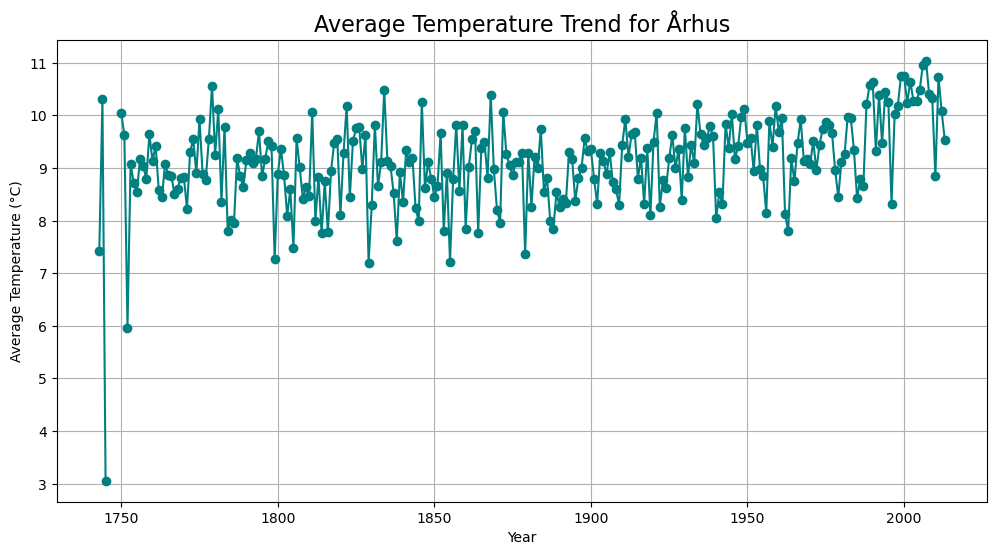

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
print(data.columns)
city_data = data[data['City'] == 'Zwolle'].copy() 
city_data['dt'] = pd.to_datetime(city_data['dt'], errors='coerce')
city_data['year'] = city_data['dt'].dt.year

annual_avg_year = city_data.groupby('year')['AverageTemperature'].mean().reset_index()

plt.figure(figsize=(12,6))
plt.plot(annual_avg_year['year'], annual_avg_year['AverageTemperature'], linestyle='-', marker='o', color='teal')
plt.title("Average Temperature Trend for Århus", fontsize=16)
plt.xlabel("Year")
plt.ylabel("Average Temperature (°C)")
plt.grid(True)
plt.show()

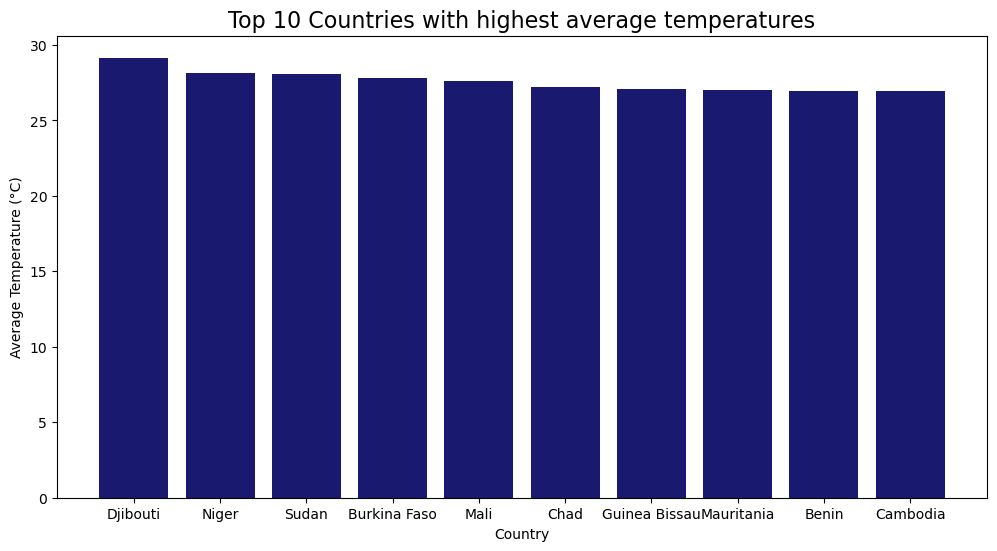

In [138]:
country_temp = data.groupby('Country')['AverageTemperature'].mean().reset_index()
country_temp=country_temp.dropna()
highest_temp=country_temp.sort_values(by='AverageTemperature',ascending=False).head(10)
plt.figure(figsize=(12,6))
plt.bar(highest_temp['Country'], highest_temp['AverageTemperature'], color='midnightblue')
plt.title("Top 10 Countries with highest average temperatures", fontsize=16)
plt.xlabel("Country")
plt.ylabel("Average Temperature (°C)")

#plt.grid(True)
plt.show()

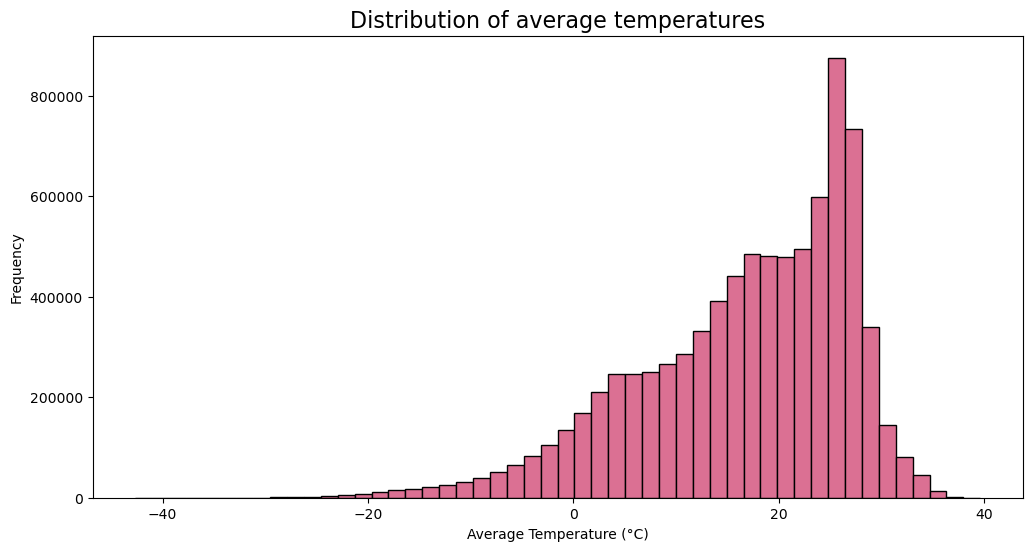

In [162]:
avg_temp=data['AverageTemperature'].dropna()
plt.figure(figsize=(12,6))
plt.hist(avg_temp,bins=50,color='palevioletred',edgecolor='black')
plt.title("Distribution of average temperatures", fontsize=16)
plt.xlabel("Average Temperature (°C)")
plt.ylabel("Frequency")
plt.show()

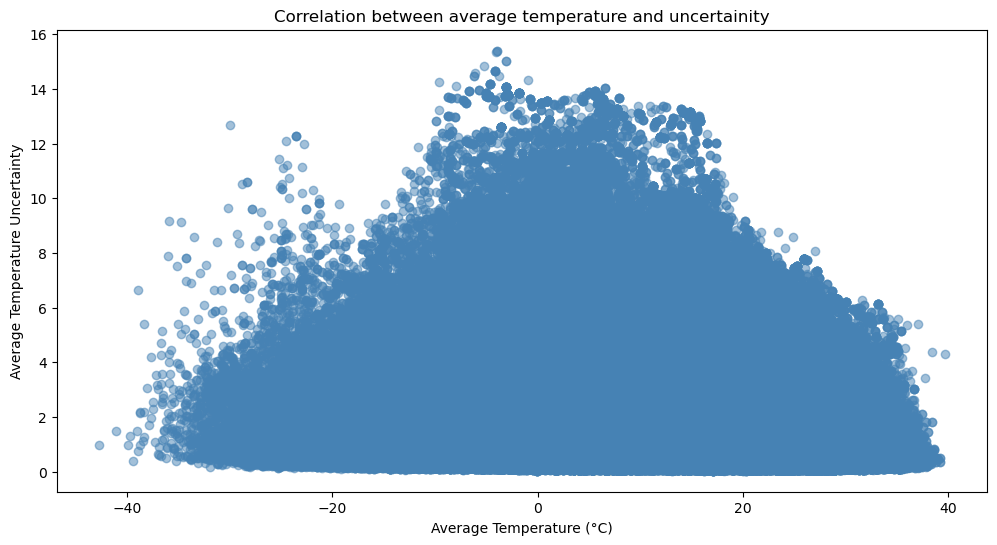

In [184]:
data.dropna()
plt.figure(figsize=(12,6))
plt.scatter(data['AverageTemperature'],data['AverageTemperatureUncertainty'],color='steelblue',alpha=0.5)
plt.title("Correlation between average temperature and uncertainity")
plt.xlabel("Average Temperature (°C)")
plt.ylabel("Average Temperature Uncertainty")
plt.show()

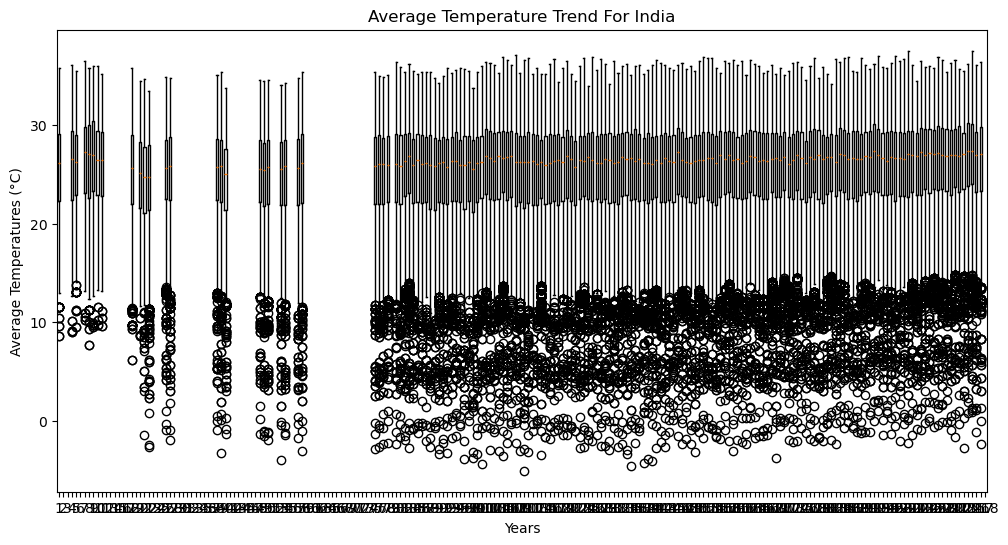

In [215]:
#import seaborn as sns
country_data = data[data['Country'] == 'India'].copy() 
country_data=country_data.dropna(subset=['dt'])
#country_data=country_data[['Year','AverageTemperature']].dropna()
grouped_data=[group['AverageTemperature'] for _, group in country_data.groupby('Year')]
plt.figure(figsize=(12,6))
plt.boxplot(grouped_data,showfliers=True)
plt.title("Average Temperature Trend For India")
plt.xlabel("Years")
plt.ylabel("Average Temperatures (°C)")
plt.show()

In [211]:
#seaborn
#seaborn has several builtin datasets such as tips,iris, and penguins
import seaborn as sns
tips=sns.load_dataset('tips')
print(tips.head())

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


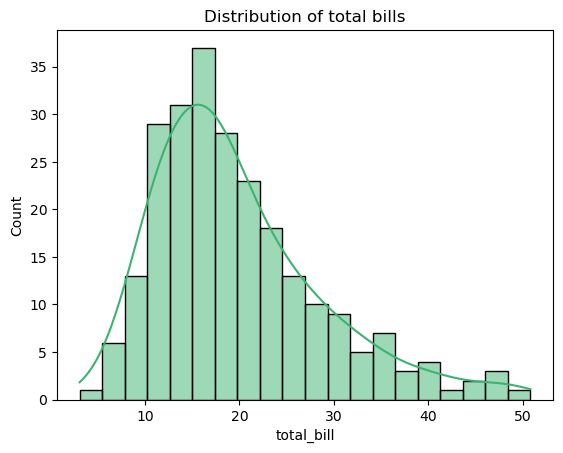

In [225]:
#Histogram
sns.histplot(data=tips,x='total_bill',kde=True,bins=20,color='mediumseagreen')
plt.title("Distribution of total bills")
plt.show()

C:\Users\CVR\AppData\Local\Temp\ipykernel_6768\2037239217.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=tips,x='total_bill',shade=True,color='navy')


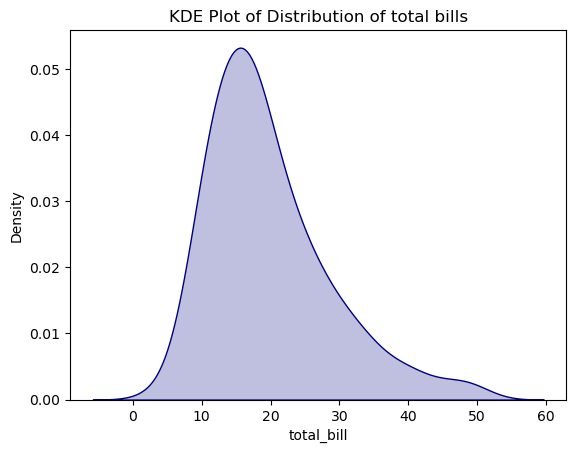

In [231]:
#Kernal Density Estimation(KDE) Plot
sns.kdeplot(data=tips,x='total_bill',shade=True,color='navy')
plt.title("KDE Plot of Distribution of total bills")
plt.show()

C:\Users\CVR\AppData\Local\Temp\ipykernel_6768\3647865870.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=tips,x='day',y='tip',palette='magma')


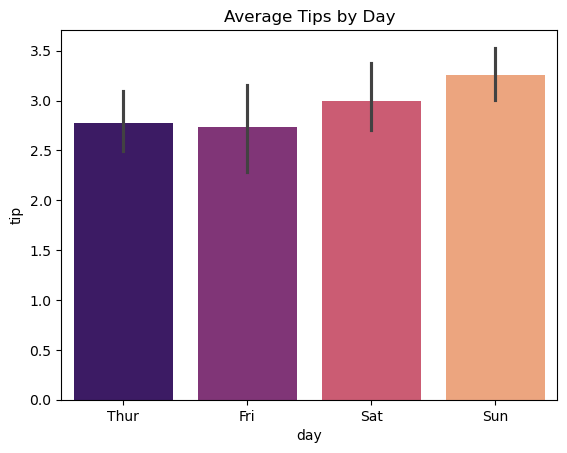

In [237]:
#Bar Plot
sns.barplot(data=tips,x='day',y='tip',palette='magma')
plt.title("Average Tips by Day")
plt.show()

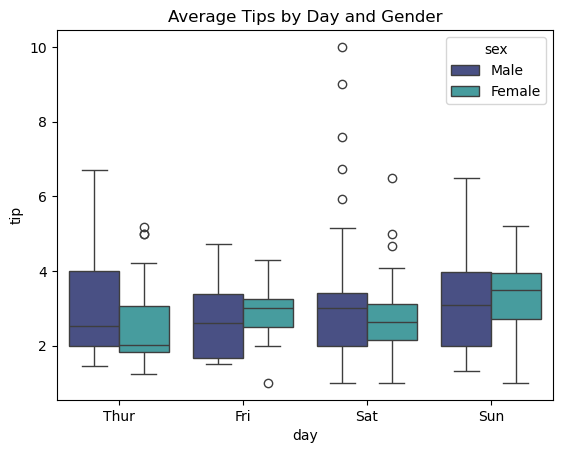

In [279]:
#Box plot
sns.boxplot(data=tips,x='day',y='tip',hue='sex',palette='mako')
plt.title("Average Tips by Day and Gender")
plt.show()

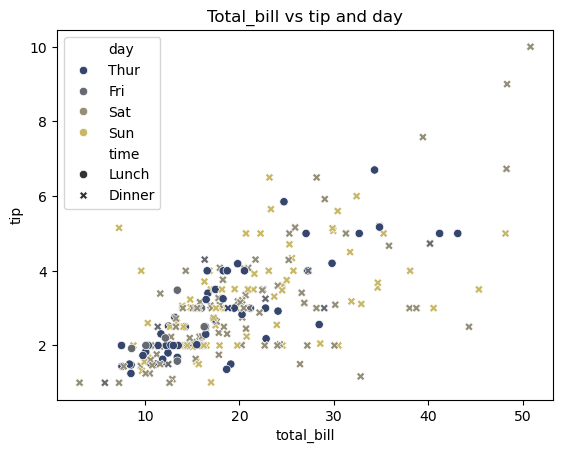

In [313]:
sns.scatterplot(data=tips,x='total_bill',y='tip',hue='day',style='time',palette='cividis')
plt.title("Total_bill vs tip and day")
plt.show()

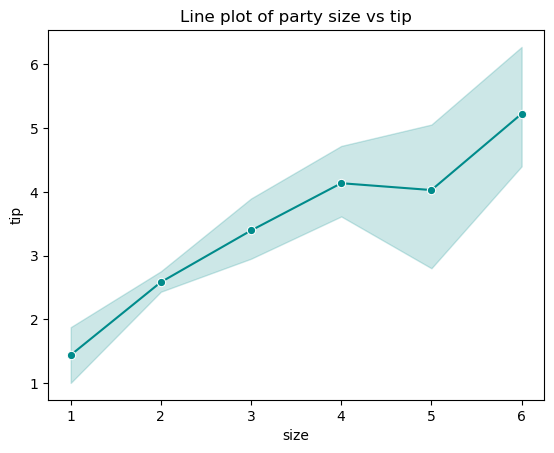

In [291]:
#lineplot, pairplot, heatmap
sns.lineplot(data=tips,x='size',y='tip',marker='o',color='darkcyan')
plt.title("Line plot of party size vs tip")
plt.show()

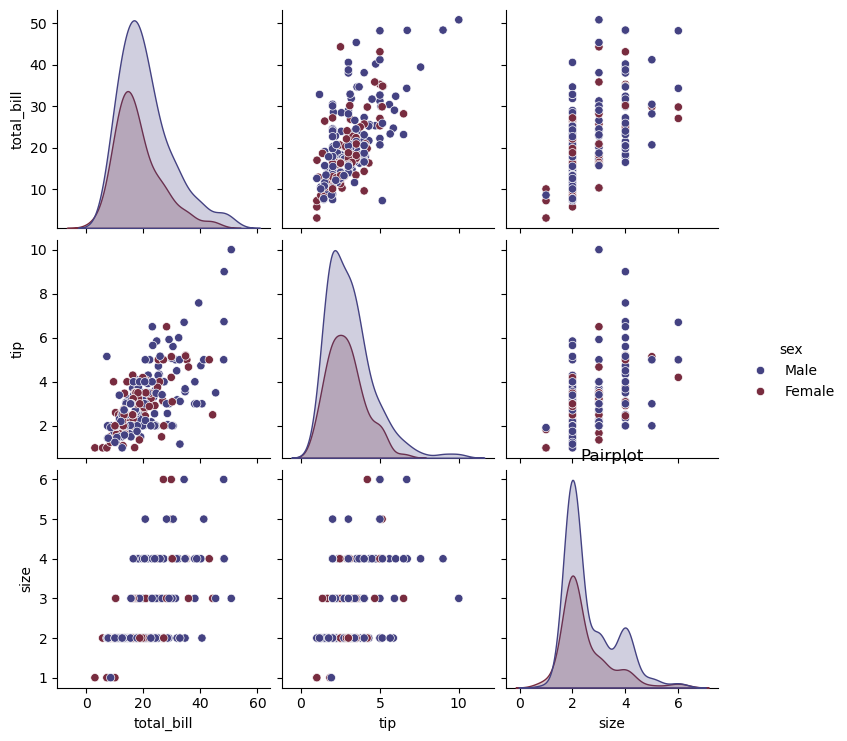

In [299]:
sns.pairplot(data=tips,hue='sex',palette='icefire')
plt.title("Pairplot")
plt.show()

In [303]:
tips.dtypes


total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object

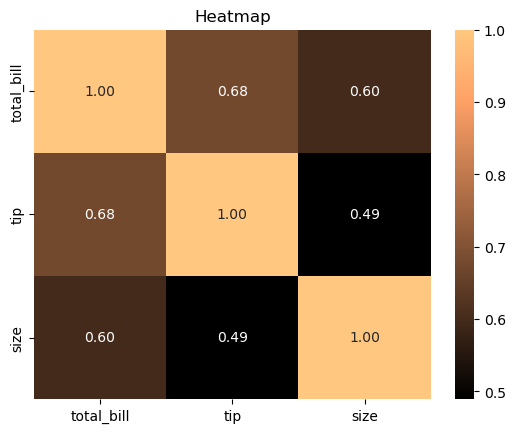

In [327]:

numeric_columns=tips.select_dtypes(include=['number'])
corr_matrix=numeric_columns.corr()
sns.heatmap(corr_matrix,annot=True,cmap='copper',fmt='.2f')
plt.title("Heatmap")
plt.show()

In [335]:
test=pd.read_csv('test.csv')
test


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [11]:
train=pd.read_csv('train.csv')
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


C:\Users\CVR\AppData\Local\Temp\ipykernel_6768\2580475261.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=train,x='Pclass',y='Survived',errorbar=None,palette='inferno')


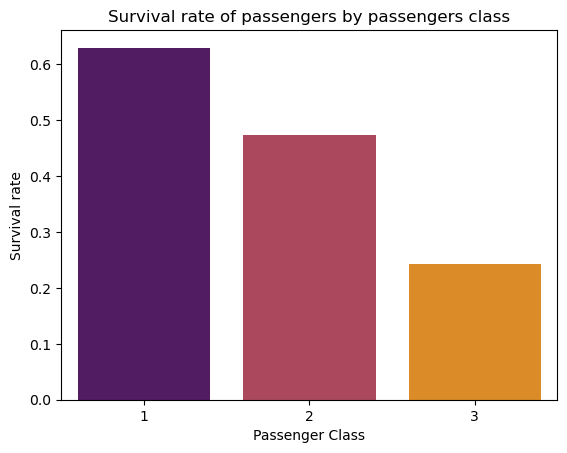

In [359]:
sns.barplot(data=train,x='Pclass',y='Survived',errorbar=None,palette='inferno')
plt.title("Survival rate of passengers by passengers class")
plt.xlabel("Passenger Class")
plt.ylabel("Survival rate")
plt.show()

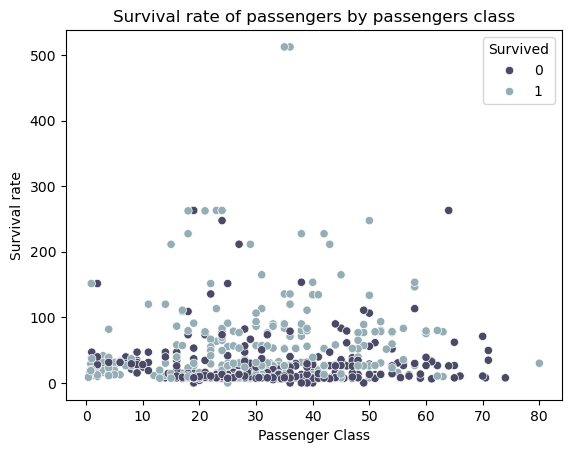

In [369]:
sns.scatterplot(data=train,x='Age',y='Fare',hue='Survived',palette='bone')
plt.title("Survival rate of passengers by Age and Fare")
plt.xlabel("Passenger Class")
plt.ylabel("Survival rate")
plt.show()

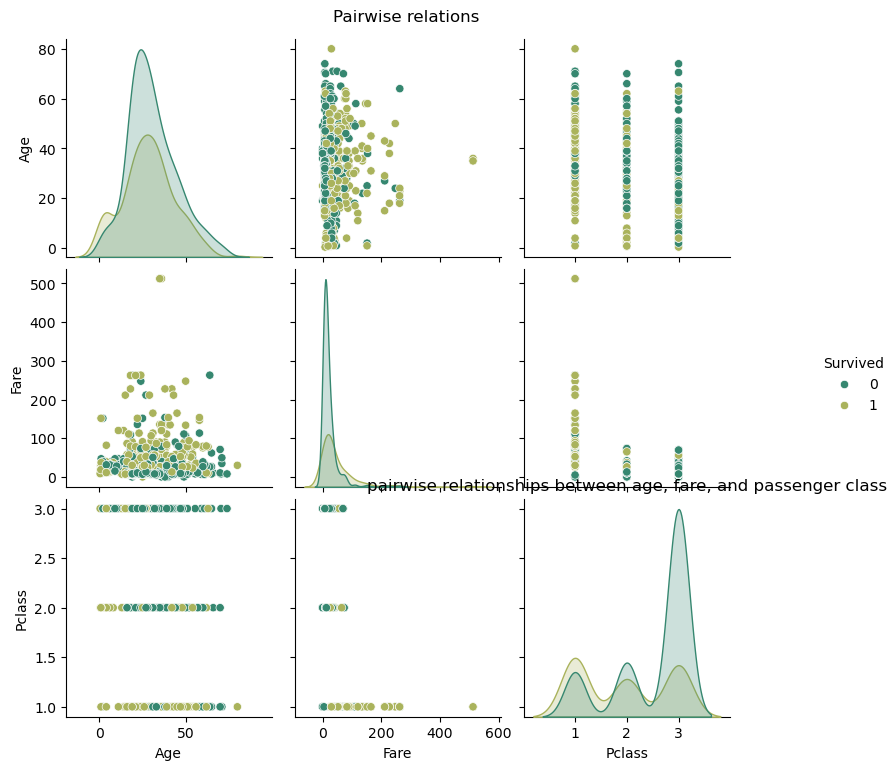

In [377]:
subset=train[['Age','Fare','Pclass','Survived']]
sns.pairplot(subset,hue='Survived',palette='gist_earth',diag_kind='kde')
plt.title("pairwise relationships between age, fare, and passenger class")
plt.suptitle('Pairwise relations',y=1.02)
plt.xlabel("Passenger Class")
plt.ylabel("Survival rate")
plt.show()

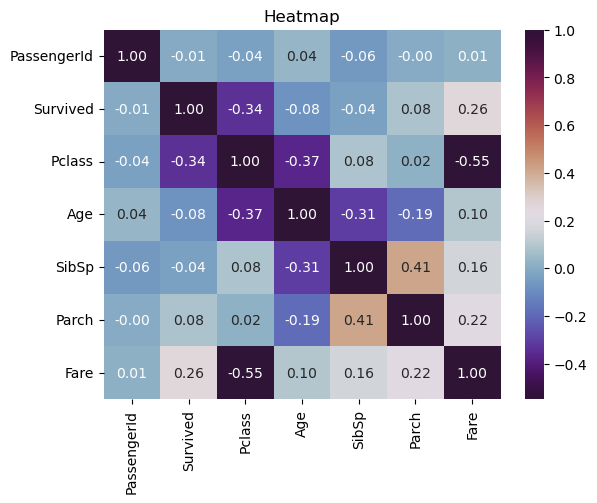

In [17]:
import seaborn as sns
numeric_columns=train.select_dtypes(include=['number'])
corr_matrix=numeric_columns.corr()
sns.heatmap(corr_matrix,annot=True,cmap='twilight_shifted',fmt='.2f')
plt.title("Heatmap")
plt.show()
